In [1]:
%cd C:\Users\debie\Documents\anaconda_space

C:\Users\debie\Documents\anaconda_space


# Predicting Car Prices

In [2]:
import pandas as pd
import numpy as np

In this project, you'll practice the machine learning workflow you've learned so far to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

In [3]:
col_name = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
pd.options.display.max_columns = 50
cars = pd.read_csv('imports-85.data', names = col_name)

In [4]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


We usually can't have any missing values if we want to use them for predictive modeling. Based on the data set preview from the last step, we can tell that the normalized-losses column contains missing values represented using "?". Let's replace these values and look for the presence of missing values in other numeric columns. Let's also rescale the values in the numeric columns so they all range from 0 to 1.

In [5]:
cars.replace('?', np.nan, inplace = True)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
num_col = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars[num_col] = cars[num_col].astype('float64')

cars_new = cars[num_col]


We'll delete the rows where the price has a null value and replace all the other null values of the other columns with the mean of their column.

In [8]:
cars_new = cars_new.dropna(subset = ['price'])

cars_new = cars_new.fillna(cars_new.mean())

In [9]:
cars_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  201 non-null    float64
 1   wheel-base         201 non-null    float64
 2   length             201 non-null    float64
 3   width              201 non-null    float64
 4   height             201 non-null    float64
 5   curb-weight        201 non-null    float64
 6   engine-size        201 non-null    float64
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-rate   201 non-null    float64
 10  horsepower         201 non-null    float64
 11  peak-rpm           201 non-null    float64
 12  city-mpg           201 non-null    float64
 13  highway-mpg        201 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 25.1 KB


Now we normalize every columns except the price one.

In [10]:
price = cars_new['price']
cars_new = (cars_new - cars_new.min()) / (cars_new.max() - cars_new.min())
cars_new['price'] = price

Let's start with some univariate k-nearest neighbors models.

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(training_column, target_column, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    half = int(len(rand_df) / 2)
    train_df = df[0:half]
    test_df = df[half:]
    knn.fit(train_df[[training_column]], train_df[target_column])
    predictions = knn.predict(test_df[[training_column]])
    mse = mean_squared_error(test_df[target_column], predictions)
    return mse**0.5

In [12]:
col_try = list(cars_new.columns)
col_try.remove('price')

result_rmse = {}
for column in col_try:
    result = knn_train_test(column, 'price', cars_new)
    result_rmse[column] = result

In [13]:
result_rmse

{'normalized-losses': 8131.436882072488,
 'wheel-base': 9969.243291700175,
 'length': 8304.189346264562,
 'width': 7110.412630045104,
 'height': 10839.693635873846,
 'curb-weight': 5166.828580646175,
 'engine-size': 4190.43388788236,
 'bore': 13397.091693481998,
 'stroke': 9334.714914185055,
 'compression-rate': 8096.301512113387,
 'horsepower': 4267.730361029788,
 'peak-rpm': 9759.209969770063,
 'city-mpg': 4814.77801484941,
 'highway-mpg': 4628.7930938146865}

With this k value, the column who performed the best is "engine-size".

We'll now try several values for k.

In [14]:
def knn_train_test(training_column, target_column, df):
    k_list = [1,3,5,7,9]
    rmse = {}
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    half = int(len(rand_df) / 2)
    train_df = df[0:half]
    test_df = df[half:]
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[[training_column]], train_df[target_column])
        predictions = knn.predict(test_df[[training_column]])
        mse = mean_squared_error(test_df[target_column], predictions)
        rmse[k] = mse**0.5
    return rmse

In [15]:
result_rmse = {}
for column in col_try:
    result = knn_train_test(column, 'price', cars_new)
    result_rmse[column] = result

In [16]:
result_rmse

{'normalized-losses': {1: 11628.904782718988,
  3: 9578.793245190305,
  5: 8131.436882072488,
  7: 7441.814253467208,
  9: 7644.0837748147915},
 'wheel-base': {1: 8052.050206913359,
  3: 9171.153878561105,
  5: 9969.243291700175,
  7: 8938.808809133783,
  9: 8637.3043859821},
 'length': {1: 10053.579063701594,
  3: 8230.050248540974,
  5: 8304.189346264562,
  7: 8483.928913734228,
  9: 7655.12304417215},
 'width': {1: 8044.1444455819,
  3: 7234.558219432825,
  5: 7110.412630045104,
  7: 6621.848358316696,
  9: 6531.417638109127},
 'height': {1: 13032.276289928392,
  3: 11411.019683044135,
  5: 10839.693635873846,
  7: 10041.327943738908,
  9: 9313.330965281266},
 'curb-weight': {1: 6566.749175404316,
  3: 5635.184748392448,
  5: 5166.828580646175,
  7: 5239.631250704795,
  9: 5244.5555635847895},
 'engine-size': {1: 5338.7918201602415,
  3: 4698.501673022703,
  5: 4190.43388788236,
  7: 4114.571307788718,
  9: 4056.629359658438},
 'bore': {1: 16502.858944335483,
  3: 13895.11178798717,

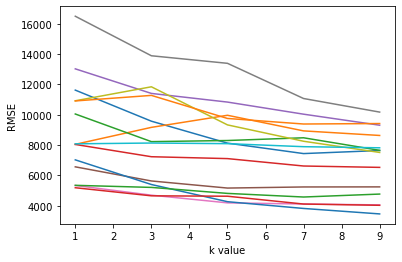

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in result_rmse.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

In [18]:
feature_avg_rmse = {}
for k,v in result_rmse.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

engine-size           4479.785610
highway-mpg           4522.911624
horsepower            4795.755143
city-mpg              4943.696718
curb-weight           5570.589864
width                 7108.476258
compression-rate      8007.936956
length                8545.374123
normalized-losses     8885.006588
wheel-base            8953.712114
stroke                9576.240416
peak-rpm             10154.303501
height               10927.529704
bore                 13009.824975
dtype: float64


In [33]:
f_temp = sorted_features.tolist()
features = [f_temp[0:i] for i in range(2,6)]

def knn_train_test(training_column, target_column, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    half = int(len(rand_df) / 2)
    train_df = df[0:half]
    test_df = df[half:]
    knn.fit(train_df[training_column], train_df[target_column])
    predictions = knn.predict(test_df[training_column])
    mse = mean_squared_error(test_df[target_column], predictions)
    return mse**0.5

plury_rmse = {}
for f in features:
    plury_rmse[tuple(f)] = knn_train_test(f,'price',cars_new)



In [34]:
plury_rmse

{('engine-size', 'highway-mpg'): 4350.739368552121,
 ('engine-size', 'highway-mpg', 'horsepower'): 3553.981440358945,
 ('engine-size', 'highway-mpg', 'horsepower', 'city-mpg'): 3543.6021088353828,
 ('engine-size',
  'highway-mpg',
  'horsepower',
  'city-mpg',
  'curb-weight'): 3874.8264102159374}

For the top 3 models in the last step, we'll vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.

In [35]:
def knn_train_test(training_column, target_column, df):
    k_list = [i for i in range(1,26)]
    rmse = {}
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    half = int(len(rand_df) / 2)
    train_df = df[0:half]
    test_df = df[half:]
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[training_column], train_df[target_column])
        predictions = knn.predict(test_df[training_column])
        mse = mean_squared_error(test_df[target_column], predictions)
        rmse[k] = mse**0.5
    return rmse

In [38]:
top_model = [['engine-size', 'highway-mpg', 'horsepower', 'city-mpg'],
             ['engine-size', 'highway-mpg', 'horsepower'],
             ['engine-size','highway-mpg','horsepower','city-mpg','curb-weight']]


result_rmse = {}
for column in top_model:
    result = knn_train_test(column, 'price', cars_new)
    result_rmse[tuple(column)] = result



In [39]:
result_rmse

{('engine-size',
  'highway-mpg',
  'horsepower',
  'city-mpg'): {1: 4003.9828413792443, 2: 4131.951959131938, 3: 3807.458087636542, 4: 3645.9482887864647, 5: 3543.6021088353828, 6: 3462.33319634914, 7: 3381.3053052910514, 8: 3221.8924875642992, 9: 3020.3504183783566, 10: 3082.8858075793623, 11: 3203.3271940951367, 12: 3320.32157031635, 13: 3480.138098268782, 14: 3483.163466888698, 15: 3488.2073831867865, 16: 3460.6885466860917, 17: 3420.7342053495818, 18: 3380.3570582571792, 19: 3379.807908444524, 20: 3386.3950236041705, 21: 3354.438473986951, 22: 3356.3575258604455, 23: 3360.720166186331, 24: 3363.297072238637, 25: 3381.1823157406384},
 ('engine-size', 'highway-mpg', 'horsepower'): {1: 3573.428345246881,
  2: 3918.785387510566,
  3: 4012.2889992124597,
  4: 3613.015900672851,
  5: 3553.981440358945,
  6: 3451.4337330349185,
  7: 3387.6562998182267,
  8: 3175.405256889689,
  9: 3077.2931249951084,
  10: 3205.004979499074,
  11: 3335.759981381083,
  12: 3501.7441190855247,
  13: 3644.6

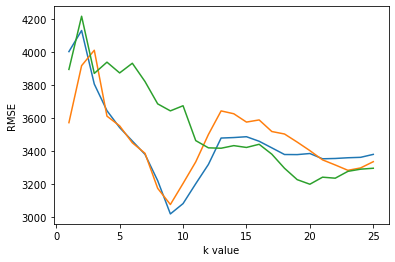

In [40]:
for k,v in result_rmse.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')